<a href="https://www.kaggle.com/code/sonalanand/spotify-project-day-04?scriptVersionId=232736562" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🎧 Day 4 – Visualising Deeper Patterns in Spotify Trends

Today’s focus is on exploring the Spotify dataset using **6 new visualisation techniques** not used in the previous 3 days. These plots help us understand how musical attributes like energy, valence, mood, danceability, and time trends interact — from new angles.

Each question reinforces a unique way to observe data across relationships, distributions, and grouped metrics.

---

### 📌 Questions Covered in Day 4:

#### ✅ **Q1: Line Plot**
**Goal:** Number of songs by number of contributing artists  
*Tool used:* `sns.lineplot()`

#### ✅ **Q2: Swarm Plot**
**Goal:** Visualise how valence varies across moods, with energy as colour  
*Tool used:* `sns.swarmplot()` + `hue`

#### ✅ **Q3: Histogram**
**Goal:** Understand the distribution of danceability across tracks  
*Tool used:* `sns.histplot()` + `kde`

#### ✅ **Q4: Pairplot**
**Goal:** Explore pairwise relationships between multiple audio features  
*Tool used:* `sns.pairplot()`

#### ✅ **Q5: Heatmap**
**Goal:** Compare average playlist appearances across song moods  
*Tool used:* `sns.heatmap()` with pivot

#### ✅ **Q6: Bubble Chart**
**Goal:** Map danceability vs streams, with bubble size = energy and colour = valence  
*Tool used:* `plt.scatter()` + `colorbar()`

---

Let’s dive into these and visualise the sound of Spotify from more perspectives 🎶👇


In [1]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify-dataset-for-self-practise/spotify_2023.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correct file path based on the output
file_path = "/kaggle/input/spotify-dataset-for-self-practise/spotify_2023.csv"

# Load the CSV file
try:
    df = pd.read_csv(file_path, encoding="ISO-8859-1")
    print("Dataset loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the file path.")

Dataset loaded successfully.
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                

✅ Q1: Bar Plot

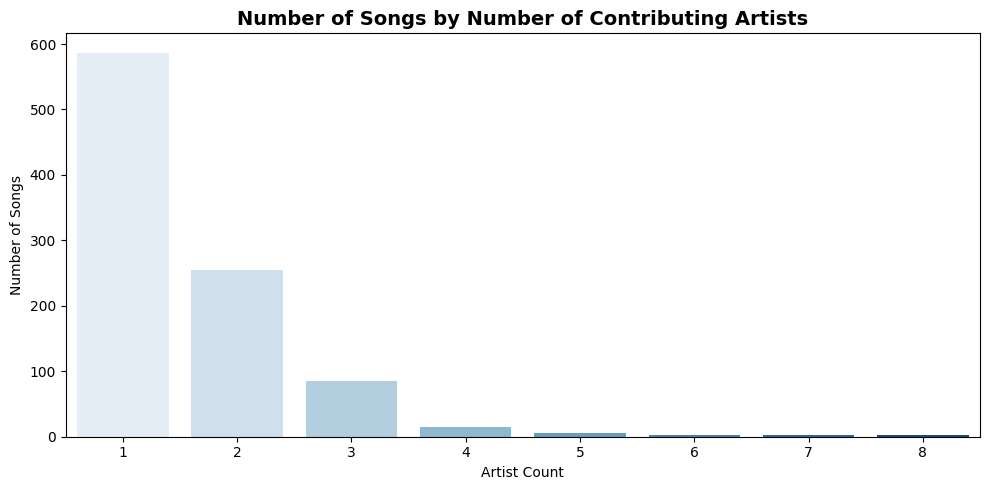

In [3]:
plt.figure(figsize=(10, 5))


sns.countplot(data=df, x='artist_count', palette='Blues')


plt.title("Number of Songs by Number of Contributing Artists", fontsize=14, fontweight='bold')


plt.xlabel("Artist Count")
plt.ylabel("Number of Songs")


plt.tight_layout()
plt.show()

✅ Q2: Swarm Plot

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


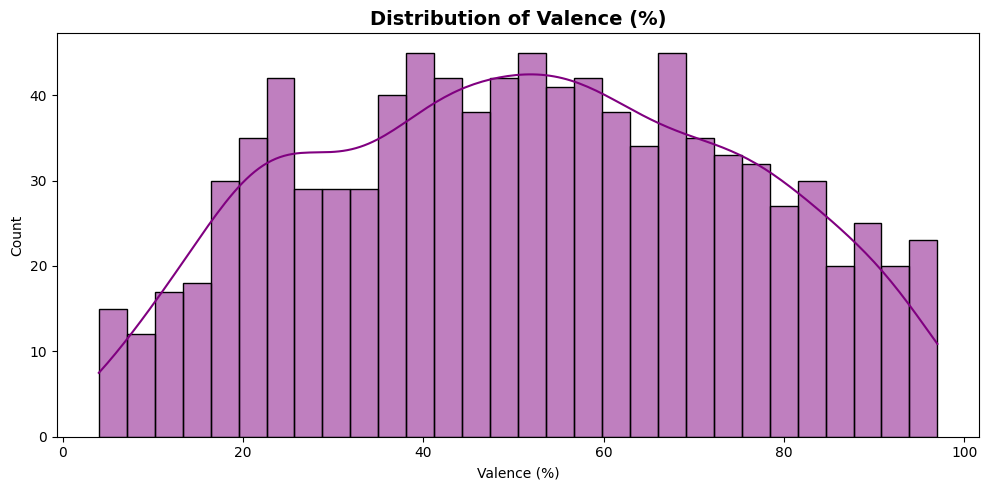

In [4]:
plt.figure(figsize=(10, 5))


sns.histplot(df['valence_%'], bins=30, color='purple', kde=True)


plt.title("Distribution of Valence (%)", fontsize=14, fontweight='bold')


plt.xlabel("Valence (%)")
plt.ylabel("Count")


plt.tight_layout()
plt.show()

✅ Q3: Histogram

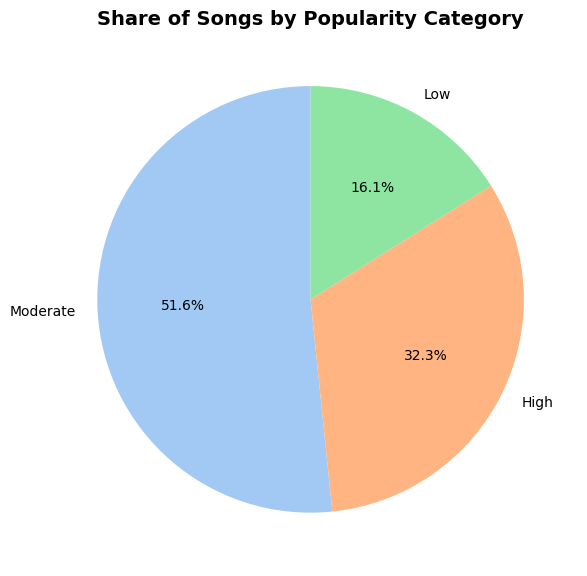

In [5]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')



df['popularity_category'] = df['streams'].apply(lambda x:
    'High' if x > 500_000_000 else
    'Moderate' if x >= 100_000_000 else 'Low')


popularity_counts = df['popularity_category'].value_counts()


plt.figure(figsize=(6, 6))


plt.pie(popularity_counts.values, labels=popularity_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))


plt.title("Share of Songs by Popularity Category", fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()

✅ Q4: Pairplot

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

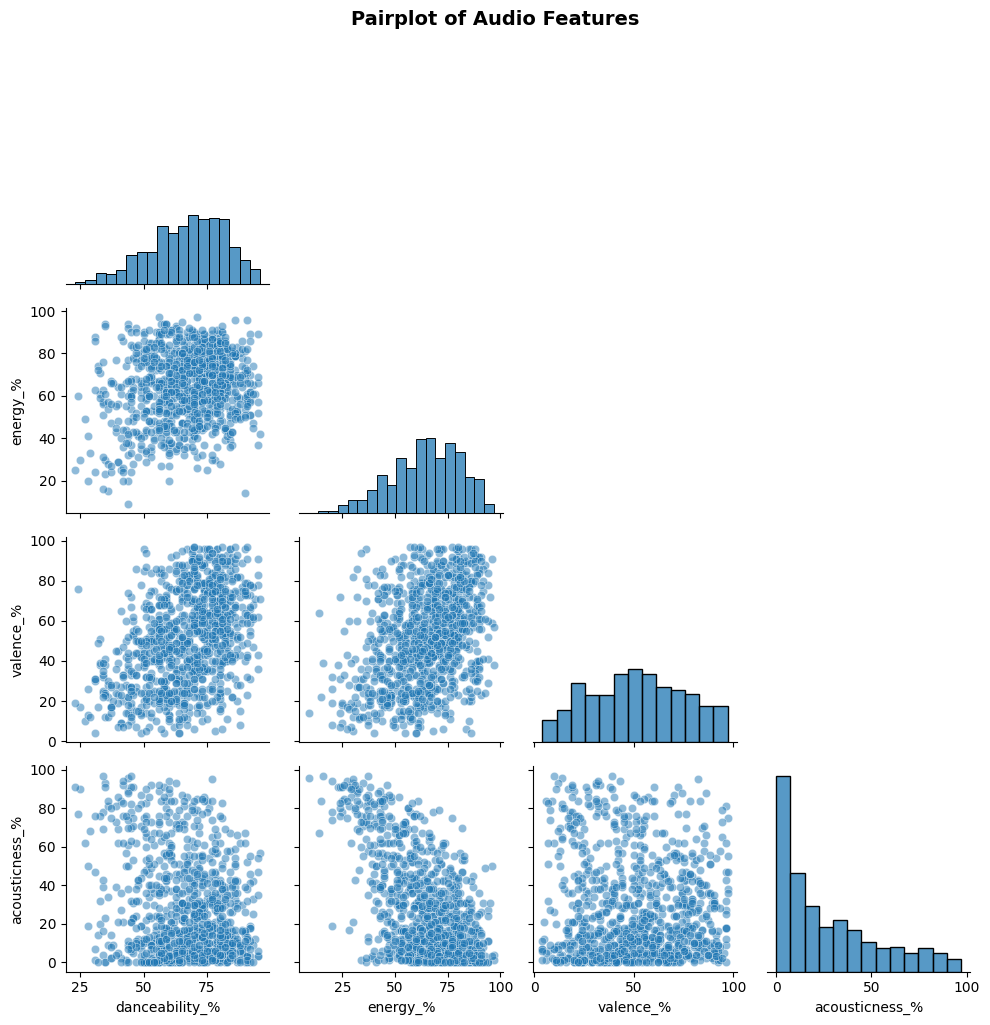

In [6]:
features_pair = df[['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']]

sns.pairplot(features_pair, corner=True, plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Audio Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

✅ Q5: Heatmap

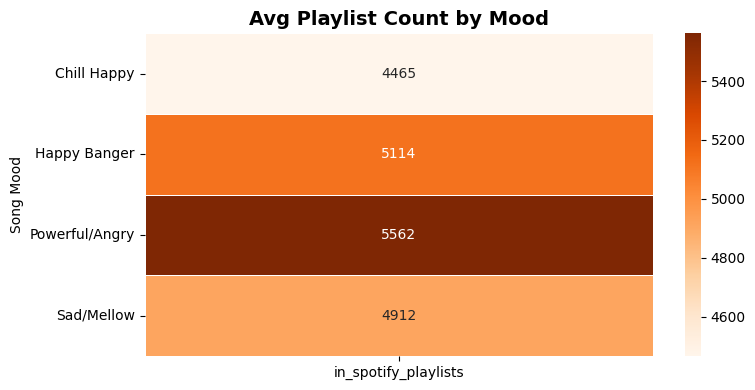

In [7]:
df['song_mood'] = df.apply(lambda x:
    'Happy Banger' if (x['valence_%'] > 50 and x['energy_%'] > 50)
    else 'Chill Happy' if (x['valence_%'] > 50)
    else 'Powerful/Angry' if (x['energy_%'] > 50)
    else 'Sad/Mellow', axis=1)


# Create pivot table
mood_playlist = df.groupby('song_mood')['in_spotify_playlists'].mean().reset_index()
pivot_mood_playlist = mood_playlist.pivot_table(index='song_mood', values='in_spotify_playlists')



# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_mood_playlist, annot=True, cmap='Oranges', fmt=".0f", linewidths=0.5)
plt.title('Avg Playlist Count by Mood', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Song Mood')
plt.tight_layout()
plt.show()